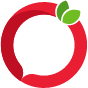

# Exploratory Analysis of Torob Search Data

Greetings and a warm welcome from Torob Data Team!

We are very excited to share with you the Torob's search data for the task of exploratory data analysis as part of OpenAI Summer School 2022. The data consists of users' search logs as well as their clicks on search results in Torob. It also includes information for a sample of the products and product categories. In this notebook, you will analyze this data and answer some questions with the goal of practicing your data analysis skills (especially the ability to work with Pandas) and also extract insightful information from our users' searches and their interaction with the search results.

Note that our original daily search data is very large (you may need gigabytes of RAM and disk space to handle the data of just one day!). So, for practical purposes and due to the size constraints, the original data has been sampled and reduced, and what you'll work with is just a small fraction of the data of one week. 

The sections marked with a triangular flag (🚩) are those which you need to read and answer. Allright, without further ado let's get started!

(NOTE: Here is the link to the guideline document of the project: https://docs.google.com/document/d/1r46gWcSXwvxxpS92cOqqA7pLuX1Vq673rokgwtnafb8/edit?usp=sharing)

---

## Import modules/libraries

So, as usual, we first need to import the neccessary libraries and modules which we would use:

In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

---

## Load and Inspect Data

In this section we load the data from given files, and then we take a quick look at their structure and make sure they have been loaded properly.

### 🚩Load data from disk

First, we need to load the data from disk as Pandas dataframes. There are four different dataframes which need to be loaded:
- Search logs, stored in `search_logs.pkl`.
- Search click logs, stored in `search_click_logs.pkl`.
- Products info, stored in `products.pkl`.
- Product categories info, stored in `categories.pkl`.

Let's load them all and store each of them in a separate variable:

**Write the answer below:** \
(Hint: Since they are stored as *pickled* files, we can easily use `pd.read_pickle` function.)

In [196]:
search_logs = pd.read_pickle('search_logs.pkl')
search_click_logs = pd.read_pickle('search_click_logs.pkl')
products = pd.read_pickle('products.pkl')
categories = pd.read_pickle('categories.pkl')

### 🚩A quick peek at the data

To quickly get a feel of the strucure of the data and see if it has been loaded correctly, we can check the first few rows of the dataframes. Let's take a look at the first five rows of each dataframe we loaded in the previous step:

**Write the answer below:** \
(Hint: heads or tails?!) 

In [197]:
products.head()

,id,title,category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320


In [198]:
products.info(), products.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108046 entries, 0 to 108045
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           108046 non-null  int64 
 1   title        108046 non-null  object
 2   category_id  108046 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ MB


(None,
                  id    category_id
 count  1.080460e+05  108046.000000
 mean   5.010806e+06    5074.481711
 std    2.888687e+06    2940.349482
 min    1.330000e+02      12.000000
 25%    2.507789e+06    2580.000000
 50%    5.010880e+06    5000.000000
 75%    7.519721e+06    7618.000000
 max    9.999925e+06    9999.000000)

In [199]:
search_logs.head()

,id,raw_query,result,datetime,category_id,user_id
0,qahft,سرویس ملامین نشکن,"[7840591, 1784875, 6716428, 6135112, 7103618, ...",2022-05-16 13:17:22.701000+00:00,NaN,MPOHZ
1,rxcka,جارو برقی,"[451703, 8801989, 8977506, 4665205, 5219768, 5...",2022-05-18 11:24:02.385000+00:00,4792.0,NZPJN
2,fnafq,دسته ps4,"[1457782, 5150503, 5921870, 909372, 9738201, 1...",2022-05-14 19:35:31.691000+00:00,NaN,NRMQA
3,ofpva,کلو تریمازول,"[404198, 812389, 339213, 929557, 3632184, 7764...",2022-05-14 18:20:55.328000+00:00,NaN,WRYZT
4,usiey,قرص فولی کوژن,"[8103652, 7283604, 4030781, 4756913, 3259566, ...",2022-05-13 19:50:03.519000+00:00,3196.0,TJLWU


In [200]:
search_logs.info(), search_logs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 539289 entries, 0 to 539288
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype              
---  ------       --------------   -----              
 0   id           539289 non-null  object             
 1   raw_query    539289 non-null  object             
 2   result       539289 non-null  object             
 3   datetime     539289 non-null  datetime64[ns, UTC]
 4   category_id  129240 non-null  float64            
 5   user_id      539289 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), object(4)
memory usage: 24.7+ MB


(None,
          category_id
 count  129240.000000
 mean     4557.751261
 std      2814.841438
 min         2.000000
 25%      2580.000000
 50%      4003.000000
 75%      6963.000000
 max      9998.000000)

In [201]:
search_click_logs.head()

,id,datetime,search_id,rank
0,jstyz,2022-05-13 19:30:14.030000+00:00,iitnm,1
1,ewusk,2022-05-13 19:30:24.290000+00:00,scjlb,2
2,osnio,2022-05-13 19:30:24.394000+00:00,ohuqq,6
3,expgi,2022-05-13 19:30:30.500000+00:00,pzrcn,3
4,srgdy,2022-05-13 19:30:32.884000+00:00,mhlmr,5


In [202]:
search_click_logs.info(), search_click_logs.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 295692 entries, 0 to 295691
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   id         295692 non-null  object             
 1   datetime   295692 non-null  datetime64[ns, UTC]
 2   search_id  295692 non-null  object             
 3   rank       295692 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(2)
memory usage: 9.0+ MB


(None,
                 rank
 count  295692.000000
 mean        2.670485
 std         2.716467
 min         0.000000
 25%         0.000000
 50%         2.000000
 75%         4.000000
 max         9.000000)

In [203]:
categories.head()

,title,id,parent_category_id
0,گوشی موبایل,2580,175.0
1,تبلت,9458,175.0
2,هدفون، هدست و هندزفری,1092,175.0
3,لوازم جانبی موبایل و تبلت,8192,175.0
4,قطعات موبایل و تبلت,3596,175.0


In [204]:
categories.info(), categories.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3137 entries, 0 to 3136
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               3137 non-null   object 
 1   id                  3137 non-null   int64  
 2   parent_category_id  3118 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 73.6+ KB


(None,
                 id  parent_category_id
 count  3137.000000         3118.000000
 mean   5032.298055         1685.333226
 std    2910.141941         1356.926306
 min       2.000000           13.000000
 25%    2518.000000          333.000000
 50%    5018.000000         1580.000000
 75%    7523.000000         2838.000000
 max    9999.000000         4333.000000)

---

## Data Validation

Before starting our analysis, it's a good practice to validate the consistency of the data values and constraints with our expectations. There are various validity checks that could be done, and below we give you two examples.

### 🚩Validate uniquness of ID columns

For example, we can confirm whether all the unique ID columns (i.e. `id` column) have no duplicate values for all the dataframes we have. Let's check this for all the four dataframes:

**Write the answer below:**

In [205]:
print('Unique test validation for products =', not products['id'].duplicated().any())
print('Unique test validation for search_logs =', not search_logs['id'].duplicated().any())
print('Unique test validation for search_click_logs =', not search_click_logs['id'].duplicated().any())
print('Unique test validation for categories =', not categories['id'].duplicated().any())

Unique test validation for products = True
Unique test validation for search_logs = True
Unique test validation for search_click_logs = True
Unique test validation for categories = True


### 🚩Validate all the search clicks have a valid rank value

Here, we would like to check two things about the rank of search click records: 1) they have no NaN value, 2) they are all between 0 and 9 (because searches have at most 10 results). Let's do these checks:

**Write the answer below:**

In [206]:
print('Any NaN value =',search_click_logs['rank'].isnull().values.any())
print('All Between 0 and 9 =',search_click_logs['rank'].between(0,10).all())

Any NaN value = False
All Between 0 and 9 = True


---

## Exploratory Data Analysis (EDA)

Now that we have loaded the data, we are ready to start the processing and analysis of our data.

### 🚩Number of searches and search clicks

The most basic stat we can get from our data is the number of searches and search clicks we have. Let's find and print them:

**Write the answer below:**

In [207]:
print('Number of searchs =',len(search_logs))
print('Number of search clicks =',search_click_logs['id'].count())


Number of searchs = 539289
Number of search clicks = 295692


### 🚩Number of unique search queries

We can also calculate the number of unique search queries.

**Write the answer below:**

In [208]:
print('Number of unique search queries =',len(np.unique(search_logs['raw_query'])))

Number of unique search queries = 260193


### 🚩Number of unique users

Another basic stat is the number of unique users who searched on Torob. We can use `user_id` column to calculate this:

**Write the answer below:**

In [209]:
print('Number of unique users who searched on Torob =',len(np.unique(search_logs['user_id'])))

Number of unique users who searched on Torob = 311083


### 🚩Most frequent search queries

We would like to know which search queries are the most popular (i.e. most frequent). We can use the "search logs" data to find the answer. Find the top 20 most searched queries along with their number of searches:

**Write the answer below:**

raw_query
iphone           7626
دلار امریکا      3240
کفش              3211
روغن             2956
لپ تاپ ایسوس     1940
دوربین عکاسی     1929
شیر              1781
دوچرخه 26        1689
xbox series s    1617
لباس عروس        1577
گوشی             1454
روغن موتور       1333
ماکروویو         1196
xiaomi 12 pro    1083
کاغذ a4          1012
تلویزیون          843
گوشی سامسونگ      812
دوچرخه            807
یخچال             789
روغن خوراکی       787
Name: id, dtype: int64

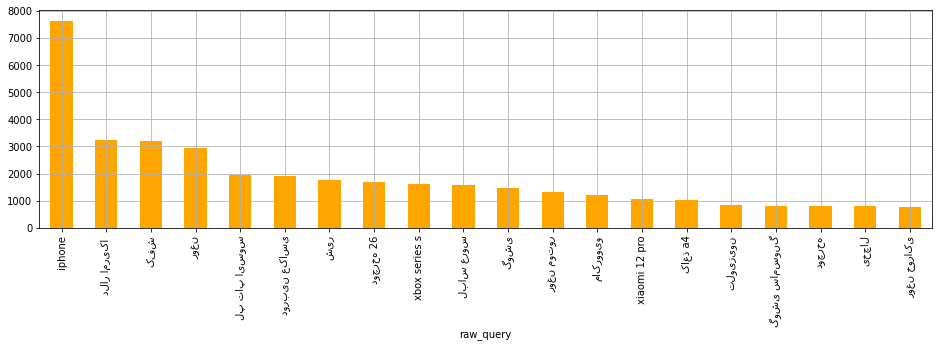

In [238]:
from turtle import color

top20 = search_logs.groupby('raw_query').count().sort_values(by='id',ascending=False)['id'].head(20)
top20.plot.bar(figsize=(16,4), color='orange').grid()
top20

### 🚩Distribution of length of search queries

We expect that the majority of search queries consist of at most three words. Let's confirm our expectation by calculating the number of words in each search query and then aggregate these values to see how the length of queries is distributed (i.e. find the distribution of number of words in search queries):

**Write the answer below:**  
(Hint: for the sake of simplicity, you can assume that in each search query the words are separated from each other by one or more whitespace characters. Yes, we know this is a simplification and has errors, but it's a good approximation. Further, note that the `str` acessor in Pandas gives you a lot of good methods for processing columns of type string and list.)

In [211]:
u_len, c_len = np.unique(search_logs['raw_query'].str.split(' ').str.len(), return_counts=True)
[(u_len[i], c_len[i]) for i in range(len(u_len))]

[(1, 133004),
 (2, 205515),
 (3, 146307),
 (4, 46853),
 (5, 6926),
 (6, 627),
 (7, 48),
 (8, 5),
 (9, 3),
 (12, 1)]

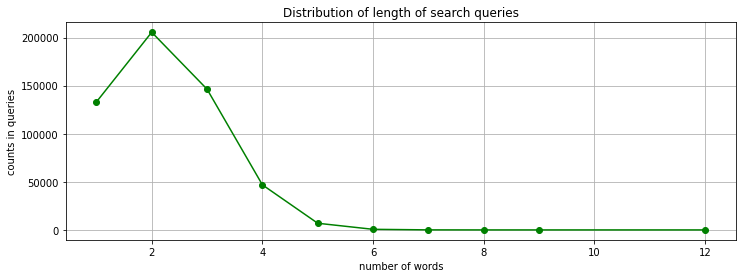

In [212]:
plt.subplots(figsize=(12, 4))
plt.plot(u_len, c_len, marker='o', c='g')
plt.xlabel('number of words')
plt.ylabel('counts in queries')
plt.title('Distribution of length of search queries')
plt.grid()
plt.show()

### 🚩Most common words in search queries

Which words were most commonly used in the search queries? Find the top 20 most common words along with their number of occurrences in search queries:

**Write the answer below:**  
(Hint: split + explode!!!)

In [213]:
temp = search_logs['raw_query'].str.split(' ')
bag_of_word={}
for row in temp:
    for word in row:
        if not word in bag_of_word:
            bag_of_word[word] = 0
        bag_of_word[word] = bag_of_word[word] + 1

sorted(bag_of_word.items(), key=lambda x: x[1], reverse=True)[1:21]

[('گوشی', 12606),
 ('روغن', 11010),
 ('iphone', 9228),
 ('موتور', 8039),
 ('کفش', 7933),
 ('pro', 6381),
 ('دوچرخه', 6094),
 ('سامسونگ', 5598),
 ('لباس', 5334),
 ('ماشین', 5266),
 ('ساعت', 5132),
 ('پراید', 5108),
 ('کولر', 4777),
 ('ای', 4418),
 ('برقی', 4400),
 ('تاپ', 4179),
 ('مردانه', 4096),
 ('یخچال', 4040),
 ('دوربین', 4026),
 ('لپ', 3987)]

### 🚩Localize date and time values

Currently, the date & time values in the search and search-click dataframes are stored in UTC timezone. This is a best-pratice to store timestamp values in UTC when the data is stored in databases; however, for our next time-based analyses to be more understandable, we need to convert them all to Tehran timezone.

Convert and replace the `datetime` columns in both search and search-click dataframes:

**Write the answer below:**  
(Hint: in Pandas, datetime columns have a `dt` accessor which offers some methods for manipulation of datetime values. Here, you should look for `tz_convert` method and use `'Asia/Tehran'` as the timezone.)

In [214]:
search_logs['datetime_tehran'] = search_logs['datetime'].dt.tz_convert('Asia/Tehran')
search_click_logs['datetime_tehran'] = search_click_logs['datetime'].dt.tz_convert('Asia/Tehran')

### 🚩Number of searches and search-clicks per weekday

Now that we have converted the datetime to Tehran timezone, we are interested to know how many searches and search-clicks exist per weekday (i.e. Saturday, Sunday, Monday, etc.). We expect that both of these numbers to be a bit lower on weekends (i.e. Thursday and Friday).

Calculate the number of searches and search-clicks per weekday and plot both alongside each other in a single bar plot:

**Write the answer below:**  
(Hint: again, you can use the methods which exist via `dt` accessor to get the weekday of datetime values. As a challenge, try to write all the calculations and plotting in just a single python statement by using method chaining... a lot!)

,search,click
datetime,,
Friday,74187,41024
Monday,78119,42949
Saturday,79183,43580
Sunday,76825,41940
Thursday,74550,41032
Tuesday,78858,42556
Wednesday,77567,42611


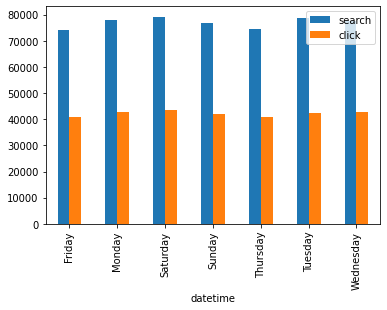

In [215]:
data = pd.concat( [i.groupby(i['datetime'].dt.day_name()).id.count() for i in [search_logs, search_click_logs]], axis=1, keys=['search','click'])
data.plot.bar().legend(loc='upper right')
data

### 🚩Number of searches and search-clicks per hour of day

Next, we would like to know which hour during the day has the most search traffic.

Calculate the number of searches and search-clicks per hour and plot both alongside each other in a single bar plot (note that we are just interested in the hour regardless of the specific day; so the result should be aggregated based on hour **over all the days**):

**Write the answer below:**  
(Hint: again, `dt` accessor is your friend here as well!)

In [216]:
search_logs['hour'] = search_logs['datetime_tehran'].dt.hour
search_click_logs['hour'] = search_click_logs['datetime_tehran'].dt.hour

,search,click
hour,,
0,16868,30132
1,12413,22275
2,7491,13611
3,4253,8016
4,2574,5030
5,1955,3841
6,2253,4545
7,3572,6886
8,5669,11360


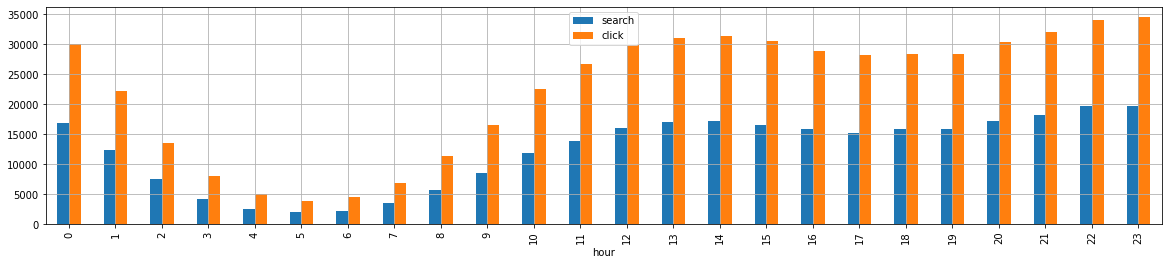

In [217]:
h_data = pd.concat([i.groupby(i['hour']).id.count() for i in [search_click_logs,search_logs]], axis=1, keys=['search','click'])
h_data.plot.bar(figsize=(20,4)).grid()
h_data

### 🚩Top 10 most frequent search queries per weekday

Now, instead of calculating the most frequent queries over all the timeframe of the data, we would like to find the top 10 most frequent queries per weekday (note that we don't need the number of searches for each query; we are just interested in the queries themeselves).

**Write the answer below:**  

In [218]:
search_logs['weekday'] = search_logs['datetime'].dt.day_name()

res = search_logs.pivot_table(index='raw_query',columns='weekday',values='id' ,aggfunc="count")

pd.DataFrame([res[i].sort_values(ascending=False).head(10).index for i in res.columns], index=res.columns)


,0,1,2,3,4,5,6,7,8,9
weekday,,,,,,,,,,
Friday,iphone,دلار امریکا,کفش,روغن,دوربین عکاسی,لباس عروس,شیر,لپ تاپ ایسوس,xbox series s,xiaomi 12 pro
Monday,iphone,دوچرخه 26,روغن,کفش,روغن موتور,لپ تاپ ایسوس,دوربین عکاسی,شیر,xbox series s,گوشی
Saturday,iphone,روغن,کفش,دوچرخه 26,روغن موتور,دوربین عکاسی,لپ تاپ ایسوس,xbox series s,مبل,گوشی
Sunday,iphone,روغن خوراکی,دوچرخه 26,روغن,کفش,روغن موتور,لپ تاپ ایسوس,دوربین عکاسی,xbox series s,گوشی
Thursday,iphone,دلار امریکا,کفش,لباس عروس,شیر,لپ تاپ ایسوس,روغن,دوربین عکاسی,xiaomi 12 pro,کاغذ a4
Tuesday,iphone,دلار امریکا,کفش,لباس عروس,روغن,شیر,کاغذ a4,xiaomi 12 pro,لپ تاپ ایسوس,دوربین عکاسی
Wednesday,iphone,دلار امریکا,کفش,شیر,لباس عروس,روغن,xiaomi 12 pro,لپ تاپ ایسوس,کاغذ a4,دوربین عکاسی


In [236]:
res

weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
raw_query,,,,,,,
\tASUS PRIME B360M-K,NaN,NaN,NaN,NaN,NaN,1.0,NaN
\tCanon EOS R3,NaN,NaN,NaN,NaN,NaN,1.0,NaN
\tNokia C1,NaN,NaN,NaN,NaN,1.0,NaN,NaN
\tbe quiet!,NaN,NaN,1.0,NaN,NaN,NaN,NaN
\tاسلایم,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
⁹ عدااههعشآهّ۸۰bô,NaN,NaN,NaN,NaN,1.0,NaN,NaN
【無】ファンと乱交撮影会 パート2,NaN,NaN,NaN,NaN,NaN,NaN,1.0
ﭘي اس ف,NaN,1.0,NaN,NaN,NaN,NaN,NaN


### 🚩Number of searches per user

Next, we would like to know how many of the searches are done by our regular visitors or loyal users.

Calculate the number of searches per user such that we could know the number of users with at most 3 searches, between 4 and 9 searches, and at least 10 searches.

**Write the answer below:**  

In [219]:
users_log = search_logs.groupby('user_id')['id'].count()
print("number of users with at most 3 searches =",users_log[users_log<=3].count())
print("number of users with search counts between 4 and 9 =",users_log[users_log.between(4,10)].count())
print("number of users with at least 10 searches =",users_log[users_log>=10].count())

number of users with at most 3 searches = 286513
number of users with search counts between 4 and 9 = 22759
number of users with at least 10 searches = 2347


### 🚩Number of searches with or without a category

For some of the searches, a product category is also selected by the user which limits the search results to only the products in the selected category. We would like to find the number of these searches and compare it against searches without category.

Calculate the number of searches with and without a selected category by users:

**Write the answer below:**  
(Hint: if `category_id` is `NaN` for a search record, it means that search was performed without selecting a category; and consider that Pandas is very NA-friendly and also has methods for detecting `NaN` values.)

In [220]:
cat_log = pd.value_counts(search_logs['category_id'].notna()) # False = NaN
print('With Category =',cat_log[1])
print('Without Category =',cat_log[0])

With Category = 129240
Without Category = 410049


### 🚩Most frequent search queries among searches with a category

This is the same as the earlier exercise for finding the most frequent search queries, but it only consider searches with a selected category by user.

Find the top 10 most frequent search queries among searches with a category, along with their number of searches:

**Write the answer below:**  

In [221]:
cat_search = search_logs[search_logs['category_id'].notna()]
cat_search.groupby('raw_query').count().sort_values(by='id',ascending=False)['id'].head(10)

raw_query
روغن        1854
گوشی         870
تلویزیون     520
یخچال        465
موتور        364
دوچرخه       325
کولر         317
ps5          291
شیایومی      280
هارد         280
Name: id, dtype: int64

### 🚩Distribution of search clicks over different ranks

Is it more likely that the users click on the top search results instead of the lower ranked results? To find out, we need to compute the distribution of search-clicks over different ranks (i.e. number of search-clicks per rank of the clicked product in the search result).

Plot the distribution of number of search-clicks over different ranks using a bar plot:

**Write the answer below:**  

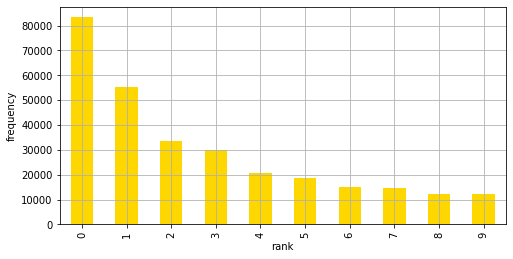

In [222]:
search_click_logs.groupby('rank').id.count().plot(kind='bar', color='gold', figsize=(8,4), xlabel='rank', ylabel='frequency').grid()

### 🚩Number of searches per number of search results

How many of the searches have zero search result? How many of them have only 1 or 2 results? To find out, we can compute the distribution of number of searches per number of search-results.

Calculate the full distribution of number of searches per number of search results:

**Write the answer below:**  

In [223]:
search_logs['len_result'] = search_logs['result'].str.len()
search_logs.groupby('len_result')['id'].count().sort_values()

len_result
9        659
7        763
8        791
5        855
6        868
4       1025
3       1245
2       1606
1       2142
0       7938
10    521397
Name: id, dtype: int64

### 🚩Most searched categories

Find the categories with the most of number of searches. We would like to know the ID of the categories as well as their **title**.

**Write the answer below:**  
(Hint: we can calculate the ID of most searched categories from "search logs" dataframe, but to find their title we should also use the "categories" dataframe; hence you probably need to perform a "join"/"merge" operation to combine the information from two dataframes.)

In [224]:
merged = pd.merge(search_logs.groupby('category_id').id.count(), categories.rename(columns={'id':'category_id'}), on='category_id')
merged.iloc[:,0:3].rename(columns={'id':'count'}).sort_values(by='count', ascending=False) 

,category_id,count,title
612,2580.0,14960,گوشی موبایل
717,3110.0,2647,روغن خوراکی
1975,8564.0,2170,لپ تاپ و نوت بوک
262,1092.0,2110,هدفون، هدست و هندزفری
195,820.0,2089,کارت گرافیک
...,...,...,...
2161,9328.0,1,شنا
1941,8411.0,1,ابزار ماکت سازی
1803,7708.0,1,سایر لوازم الکتریکی همراه
1493,6432.0,1,شبرنگ خودرو


### 🚩Number of clicks per searches

We would like to know how many of the searches have gotten no clicks, or how many of them have gotten more than one clicks. To find out, we should compute the distribution of number of clicks per searches:

**Write the answer below:**  
(Hint: the search data and search-click data are in two different dataframes. So again we may need to perform a join/merge operation).

In [225]:
m1 = pd.merge(search_logs, search_click_logs, left_on='id' ,right_on='search_id', how='left') # outer join search and search_click
m2 = m1.groupby('id_x').count() # number of clicks per each search id
m2.groupby('id_y')['id_y'].count() # number of same number clicks

id_y
0     356272
1     119648
2      38243
3      13421
4       6286
5       2428
6       1437
7        576
8        452
9        171
10       166
11        42
12        54
13        23
14        26
15        12
16        14
17         2
18         8
19         2
21         1
22         2
24         1
27         1
33         1
Name: id_y, dtype: int64

### 🚩Most clicked products

We are interested to know which product are the most popular. For that, we can count the clicks of each product and consider the most clicked products as the most popular ones. So let's find the top 20 most clicked products (we would like to know the ID, title and number of clicks for those products):

**Write the answer below:**  
(Hint: here we also need to combine information from multiple dataframes; to find the ID of clicked products, we need to consider both of "search logs" and "search clicks" dataframes, and for finding product info we additionally need the "products" dataframe.)

In [226]:
clicks = search_click_logs.loc[:,{'id','search_id','rank'}].rename(columns={'id':'click_id'}) #filter search_click_log
clicks

,click_id,rank,search_id
0,jstyz,1,iitnm
1,ewusk,2,scjlb
2,osnio,6,ohuqq
3,expgi,3,pzrcn
4,srgdy,5,mhlmr
...,...,...,...
295687,ekdor,4,yacmw
295688,rxpwg,1,keqas
295689,newqm,8,vpksd
295690,ksvlv,2,prptj


In [227]:
searchs = search_logs.loc[:,{'id','result'}].rename(columns={'id':'search_id'}) #filter search_log
searchs

,search_id,result
0,qahft,"[7840591, 1784875, 6716428, 6135112, 7103618, ..."
1,rxcka,"[451703, 8801989, 8977506, 4665205, 5219768, 5..."
2,fnafq,"[1457782, 5150503, 5921870, 909372, 9738201, 1..."
3,ofpva,"[404198, 812389, 339213, 929557, 3632184, 7764..."
4,usiey,"[8103652, 7283604, 4030781, 4756913, 3259566, ..."
...,...,...
539284,komsy,"[5453845, 8144670, 929409, 2560009, 2945123, 1..."
539285,rgtin,"[4651071, 7207811, 3198227, 5668360, 3934514, ..."
539286,ouixi,"[3627110, 6731253, 3386983, 678951, 5285940, 3..."
539287,cnemi,"[3789177, 1968708, 459464, 5077881, 6612780, 1..."


In [228]:
logs = pd.merge(searchs, clicks, on='search_id', how='right') # right join between search and click
logs

,search_id,result,click_id,rank
0,iitnm,"[8363804, 4965044, 8352519, 4171803, 2797132, ...",jstyz,1
1,scjlb,"[3977234, 7631437, 5595460, 636414, 1196615, 9...",ewusk,2
2,ohuqq,"[7856943, 3204265, 3175195, 4292810, 4341195, ...",osnio,6
3,pzrcn,"[4723903, 1308269, 9212873, 2552325, 2438519, ...",expgi,3
4,mhlmr,"[1420113, 9627228, 8607057, 6284811, 8436972, ...",srgdy,5
...,...,...,...,...
295687,yacmw,"[6754504, 2091261, 8140896, 8234088, 9727396, ...",ekdor,4
295688,keqas,"[7169056, 4898618, 1517942, 8420944, 3635761, ...",rxpwg,1
295689,vpksd,"[3163184, 7399634, 3766506, 2341761, 4685645, ...",newqm,8
295690,prptj,"[6601726, 4292725, 7711983, 6828387, 8328958, ...",ksvlv,2


In [229]:
product_id = pd.Series([logs.loc[i,'result'][logs.loc[i,'rank']] for i in range(len(logs))]) # calculate result[rank] to find product_id
logs = pd.concat([logs,product_id], axis=1).rename(columns={0:'product_id'}) # concat product_id to logs 
logs


,search_id,result,click_id,rank,product_id
0,iitnm,"[8363804, 4965044, 8352519, 4171803, 2797132, ...",jstyz,1,4965044
1,scjlb,"[3977234, 7631437, 5595460, 636414, 1196615, 9...",ewusk,2,5595460
2,ohuqq,"[7856943, 3204265, 3175195, 4292810, 4341195, ...",osnio,6,3770193
3,pzrcn,"[4723903, 1308269, 9212873, 2552325, 2438519, ...",expgi,3,2552325
4,mhlmr,"[1420113, 9627228, 8607057, 6284811, 8436972, ...",srgdy,5,7325944
...,...,...,...,...,...
295687,yacmw,"[6754504, 2091261, 8140896, 8234088, 9727396, ...",ekdor,4,9727396
295688,keqas,"[7169056, 4898618, 1517942, 8420944, 3635761, ...",rxpwg,1,4898618
295689,vpksd,"[3163184, 7399634, 3766506, 2341761, 4685645, ...",newqm,8,3184119
295690,prptj,"[6601726, 4292725, 7711983, 6828387, 8328958, ...",ksvlv,2,7711983


In [230]:
pr_grouped = logs.groupby('product_id').count().rename(columns={'click_id':'counts'})['counts'] # calculate click_count for products
pr_grouped

product_id
133        1
277        1
334        5
374        1
548        2
          ..
9999419    2
9999596    2
9999798    1
9999909    1
9999925    1
Name: counts, Length: 108054, dtype: int64

In [231]:
product_renamed = products.rename(columns={'id':'product_id','title':'pr_title','category_id':'pr_category_id'}) # rename product columns
product_renamed

,product_id,pr_title,pr_category_id
0,758287,میکروسکوپ سلسترون مدل 44121,262
1,7164195,دوربین عکاسی نیکون مدل Nikon D5600 body,1273
2,3242621,دوچرخه شهری قناری مدل Space Shuttle سایز 16,3882
3,4277974,دوچرخه سایز 16 مدل 2020 Flying Bear قناری,3882
4,8671305,دوچرخه 12 قناری مدل JENNY,4320
...,...,...,...
108041,1985506,اسلایم سارا در انواع طرح و نوع متنوع با کیفیت ...,4062
108042,5278787,پک تخصصی کُرگیری(2دستگاه،5مته و 48سگمنت),3830
108043,8977011,پیراهن مردانه Dior مدل 28793,4107
108044,2157337,پیراهن مردانه Dior مدل 28794,4107


In [232]:
most_clicked_pr = pd.merge(product_renamed,pr_grouped, left_on='product_id', right_index=True, how='inner').sort_values(by='counts', ascending=False)
most_clicked_pr[:20]
#join products with pr_grouped for title and category id

,product_id,pr_title,pr_category_id,counts
73584,6754504,گوشی اپل iPhone 13 Pro max (Not Active) | حافظ...,2580,932
83004,9619627,گوشی شیائومی Redmi Note 11 | حافظه 128 رم 6 گی...,2580,910
45444,8783002,روغن نیمه جامد غنجه 4کیلویی,3110,866
36970,3233307,گوشی سامسونگ A32 | حافظه 128 رم 6 گیگابایت,2580,705
98939,6018703,روغن آفتابگردان غنی شده با ویتامین دی810 گرم ا...,3110,665
2886,541613,روغن نیمه جامد حاوی امگا3 مناسب پخت و پز لادن ...,3110,654
74443,5373323,گوشی سامسونگ S21 FE 5G | حافظه 256 رم 8 گیگاب...,2580,601
59841,3712777,گوشی شیائومی 11T Pro 5G | حافظه 256 رم 12 گیگا...,2580,576
36775,5187589,گوشی شیائومی Poco F3 5G | حافظه 256 رم 8 گیگابایت,2580,574
94666,9634256,گوشی سامسونگ A13 | حافظه 64 رم 4 گیگابایت,2580,556


### 🚩Most clicked categories

And finally, we would like to know which categories of the products have the most clicks. In other words, we would like to find out products of which categories have gotten the most clicks in total. Let's find the top 10 most clicked categories, including the ID and title of the categories as well as the total number of clicks for each of those categories:

**Write the answer below:**  
(Hint: again, to calculate this, we need to combine the information of multiple dataframes... actually, all of them!)

In [233]:
most_clicked_cat = most_clicked_pr.groupby('pr_category_id').sum() # counts = number of clicks per category

pd.merge(most_clicked_cat, categories, left_index=True, right_on='id').sort_values(by='counts', ascending=False)[['counts','title','id']][:10]


,counts,title,id
0,42518,گوشی موبایل,2580
37,7280,روغن خوراکی,3110
2,4986,هدفون، هدست و هندزفری,1092
89,4560,لپ تاپ و نوت بوک,8564
787,2978,تلویزیون,2999
1656,2971,کیف و کاور گوشی,9663
1453,2852,کارت گرافیک,820
6,2633,ساعت و مچ بند هوشمند,3424
9,2422,کتاب و مجلات,8197
1696,2098,ماشین اصلاح و ریش‌ تراش,3064
